# Taller Grupal 1 - Métodos y aplicaciones de analítica I

**Anderson Alvarado & Juan Felipe Gonzalez Rodriguez**

# Librerias

In [2]:
# instalar aprioricon pip
%pip install efficient-apriori
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from efficient_apriori import apriori
from mlxtend.frequent_patterns import apriori as mlx_apriori
from mlxtend.frequent_patterns import association_rules
from efficient_apriori import apriori
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("coolwarm")
plt.rcParams["figure.figsize"] = (12, 8)

# Carga de Datos

In [5]:
# Cargar order_products_train.csv
order_products_train = pd.read_csv('Data/order_products__train.csv')
order_products_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [6]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [7]:
# cargar: Data/aisles.csv
aisles = pd.read_csv('Data/aisles.csv')
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [8]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
# cargar: Data/departments.csv
departments = pd.read_csv('Data/departments.csv')
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [11]:
# cargar: Data/products.csv
products = pd.read_csv('Data/products.csv')
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# unir los dataframes
order_products_all = order_products_train.merge(products, on='product_id')
order_products_all = order_products_all.merge(aisles, on='aisle_id')
order_products_all = order_products_all.merge(departments, on='department_id')
order_products_all.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs
9,36,19660,2,1,Spring Water,115,7,water seltzer sparkling water,beverages


In [14]:
order_products_all.shape

(1384617, 9)

# Descripción del dataset

In [15]:
# descripcion y analisis de datos
order_products_all.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1384617.0,1.706298e+06,989732.648868,1.0,843370.0,1701880.0,2568023.0,3421070.0
product_id,1384617.0,2.555624e+04,14121.272449,1.0,13380.0,25298.0,37940.0,49688.0
add_to_cart_order,1384617.0,8.758044e+00,7.423936,1.0,3.0,7.0,12.0,80.0
reordered,1384617.0,5.985944e-01,0.490183,0.0,0.0,1.0,1.0,1.0
aisle_id,1384617.0,7.130423e+01,38.104094,1.0,31.0,83.0,107.0,134.0
department_id,1384617.0,9.839777e+00,6.292830,1.0,4.0,8.0,16.0,21.0


In [16]:
order_products_all.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
aisle                0
department           0
dtype: int64

In [17]:
order_products_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   order_id           1384617 non-null  int64 
 1   product_id         1384617 non-null  int64 
 2   add_to_cart_order  1384617 non-null  int64 
 3   reordered          1384617 non-null  int64 
 4   product_name       1384617 non-null  object
 5   aisle_id           1384617 non-null  int64 
 6   department_id      1384617 non-null  int64 
 7   aisle              1384617 non-null  object
 8   department         1384617 non-null  object
dtypes: int64(6), object(3)
memory usage: 95.1+ MB


# Análisis Dataset

### Número de productos

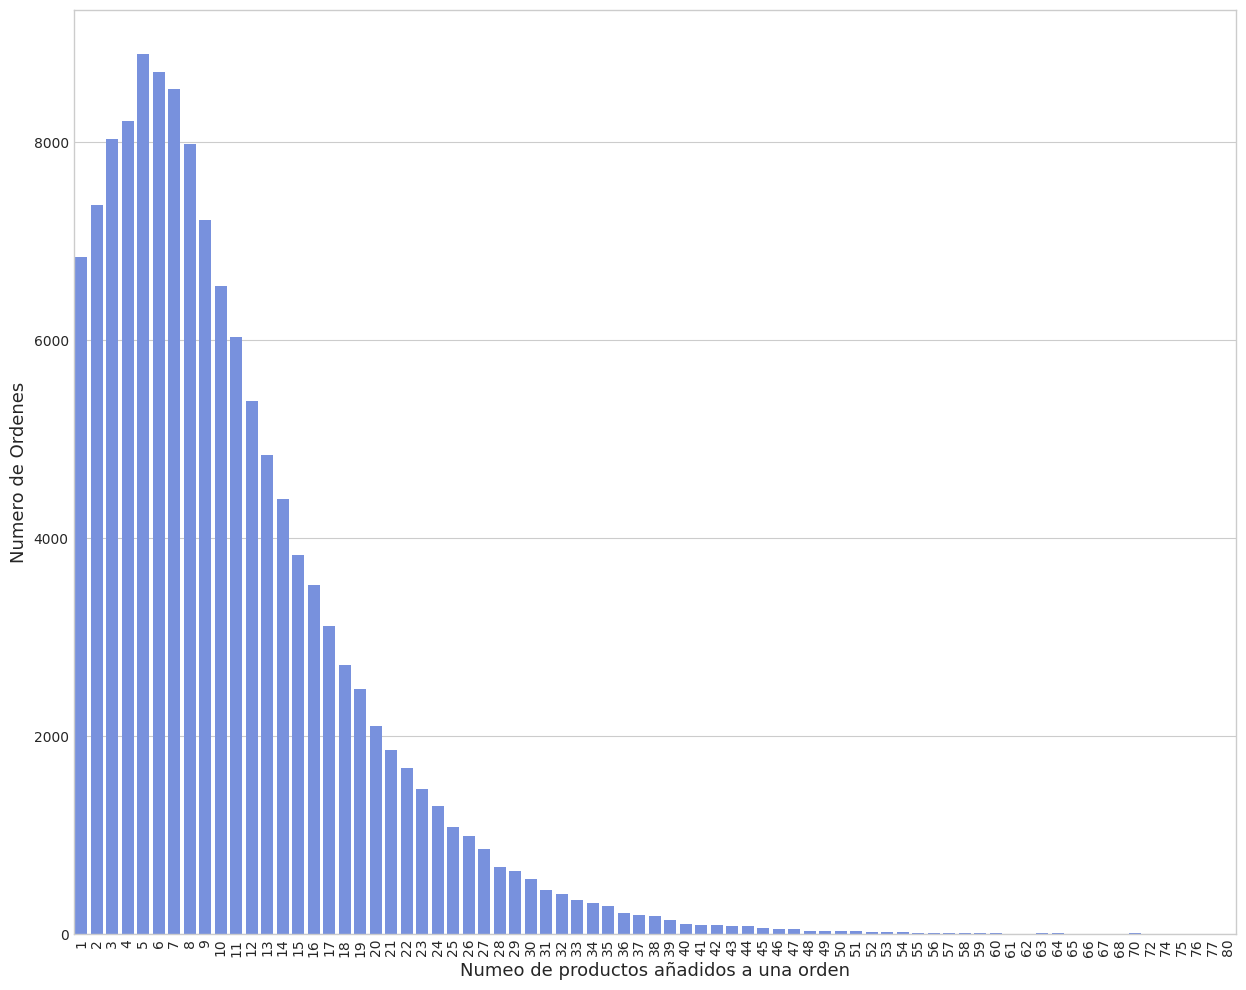

In [18]:
grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)

plt.ylabel('Numero de Ordenes', fontsize=13)
plt.xlabel('Numeo de productos añadidos a una orden', fontsize=13)
plt.show()

### Productos más ordenados

In [44]:
grouped = order_products_all.groupby("product_id")["reordered"].agg(Total_reorders='count').reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,Total_reorders,product_name
19574,24852,18726,Banana
10367,13176,15480,Bag of Organic Bananas
16685,21137,10894,Organic Strawberries
17300,21903,9784,Organic Baby Spinach
37499,47626,8135,Large Lemon
37609,47766,7409,Organic Avocado
37164,47209,7293,Organic Hass Avocado
13228,16797,6494,Strawberries
20648,26209,6033,Limes
22024,27966,5546,Organic Raspberries


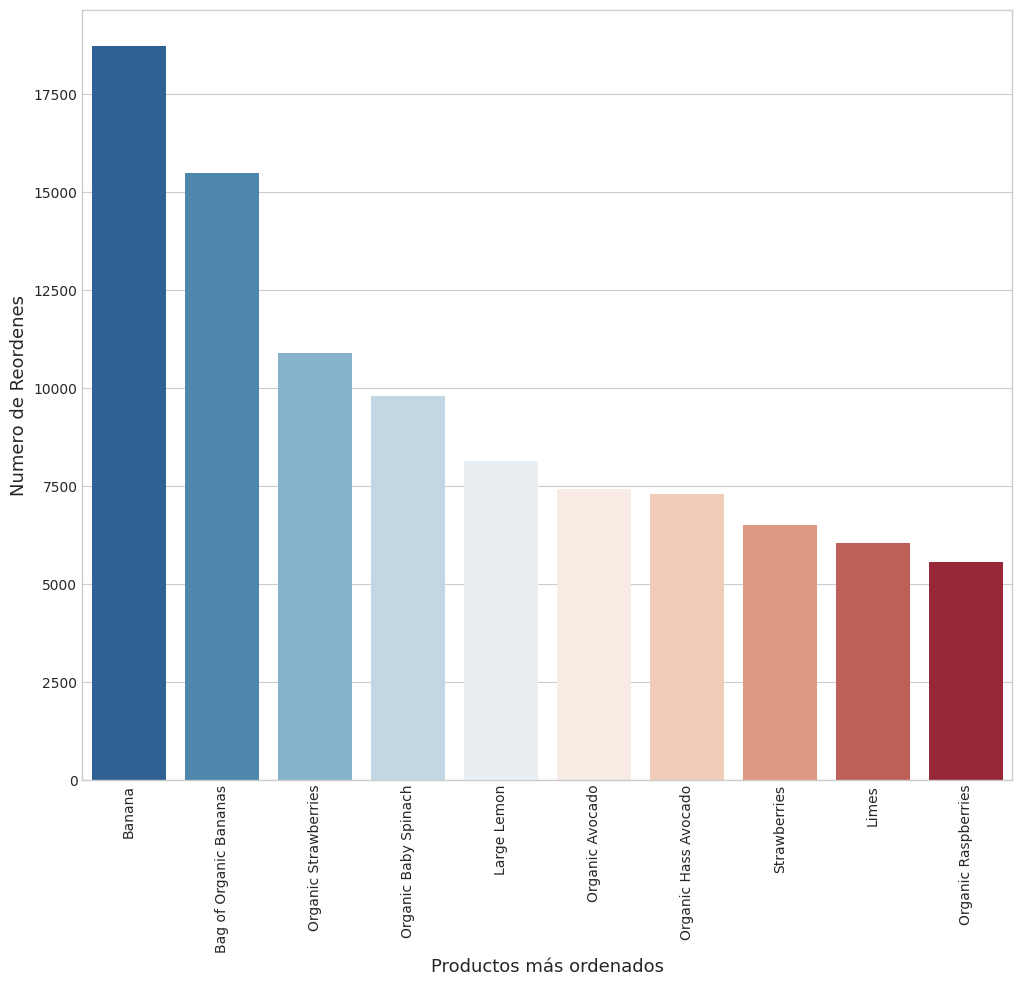

In [45]:
# Since 'grouped' is already a Series, we can directly sort its values
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values,palette='RdBu_r')
plt.ylabel('Numero de Reordenes', fontsize=13)
plt.xlabel('Productos más ordenados', fontsize=13)
plt.show()

### Frecuencia de volver a ordenar productos

In [46]:
# Primero, necesitamos mantener el DataFrame original con los ratios
grouped_ratio = order_products_all.groupby("reordered")["product_id"].agg(Total_products='count').reset_index()
grouped_ratio['Ratios'] = grouped_ratio["Total_products"] / grouped_ratio['Total_products'].sum()
grouped_ratio


,reordered,Total_products,Ratios
0,0,555793,0.401406
1,1,828824,0.598594


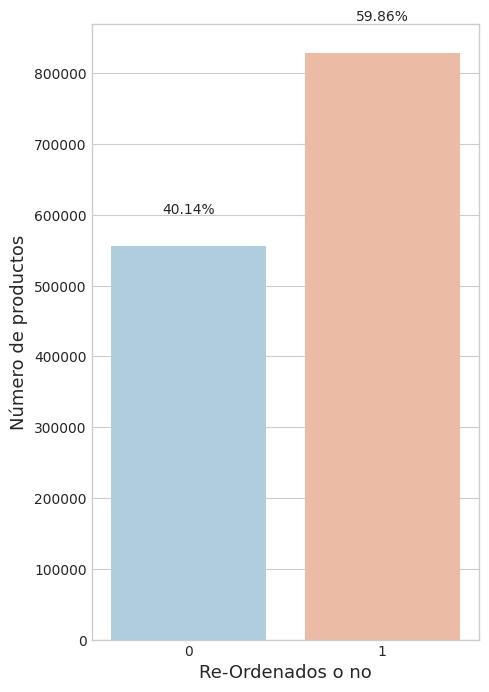

In [47]:
# Luego creamos el gráfico
f, ax = plt.subplots(figsize=(5, 8))
bars = sns.barplot(x=grouped_ratio['reordered'], y=grouped_ratio['Total_products'], palette='RdBu_r')

# Añadimos las etiquetas con los ratios
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ratio = grouped_ratio.loc[i, 'Ratios']
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05*max(grouped_ratio['Total_products']),
            f'{ratio:.2%}',  # Formato de porcentaje con 2 decimales
            ha='center', va='bottom')

plt.ylabel('Número de productos', fontsize=13)
plt.xlabel('Re-Ordenados o no', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Productos que más son ordenados nuevamente

In [51]:
grouped = order_products_all.groupby("product_id")["reordered"].agg(reorder_sum='sum', reorder_total='count').reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped

,product_id,reorder_sum,reorder_total,reorder_probability,product_name
1374,1729,86,92,0.934783,2% Lactose Free Milk
16529,20940,336,368,0.913043,Organic Low Fat Milk
16610,21038,72,81,0.888889,Organic Spelt Tortillas
19574,24852,16557,18726,0.884172,Banana
100,117,106,120,0.883333,Petit Suisse Fruit
30852,39180,426,483,0.881988,Organic Lowfat 1% Milk
9723,12384,237,269,0.881041,Organic Lactose Free 1% Lowfat Milk
18956,24024,405,461,0.878525,1% Lowfat Milk
28917,36717,71,81,0.876543,Double Fiber Bread
30462,38689,1056,1206,0.875622,Organic Reduced Fat Milk


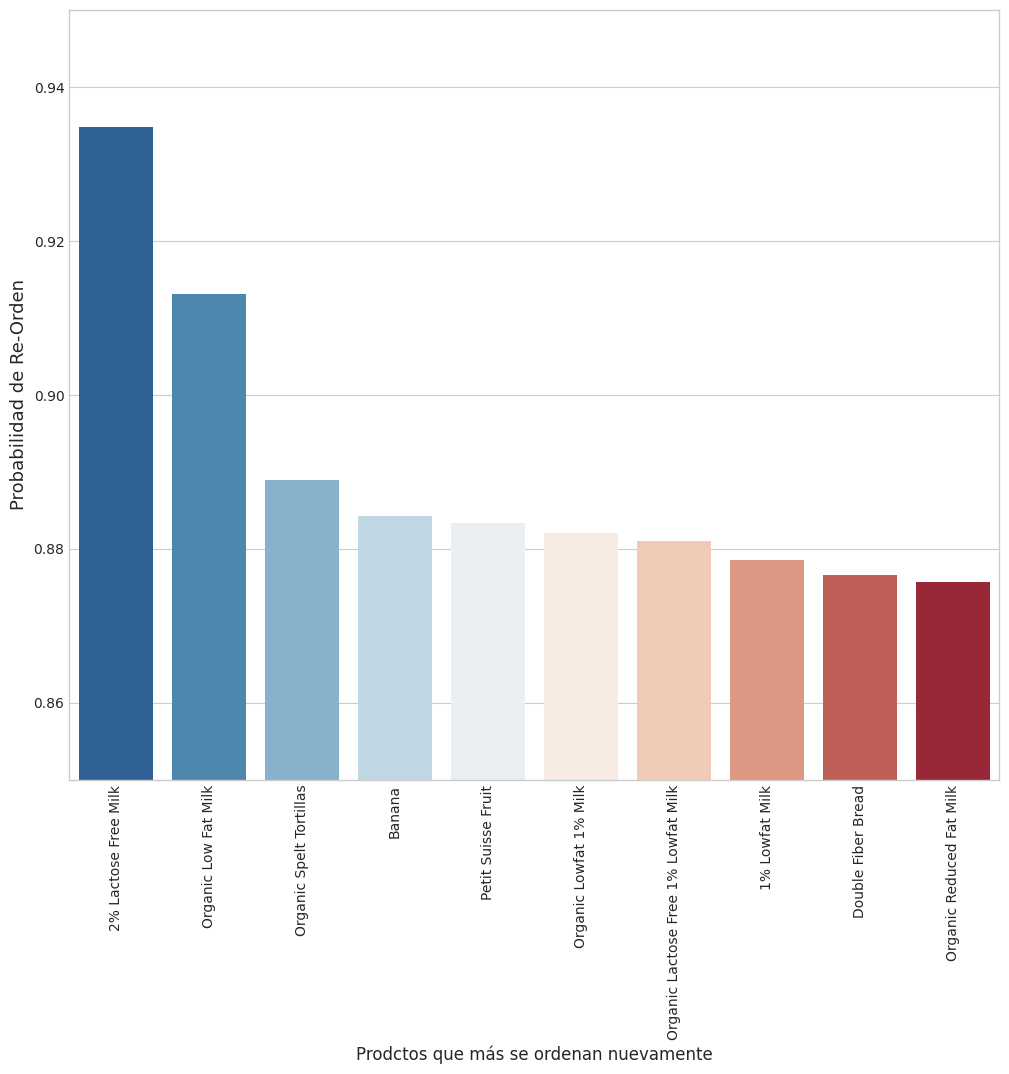

In [52]:
grouped  = grouped.groupby(['product_name']).sum()['reorder_probability'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, palette='RdBu_r')
plt.ylim([0.85,0.95])
plt.ylabel('Probabilidad de Re-Orden', fontsize=13)
plt.xlabel('Prodctos que más se ordenan nuevamente', fontsize=12)
plt.show()

### Horas del día donde ordenan productos

In [57]:
grouped = order_products_all.groupby("department")["product_id"].agg(Total_products='count').reset_index()
grouped['Ratio'] = grouped["Total_products"] / grouped['Total_products'].sum()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

,department,Total_products,Ratio
19,produce,409087,0.295451
7,dairy eggs,217051,0.156759
20,snacks,118862,0.085845
3,beverages,114046,0.082366
10,frozen,100426,0.072530
16,pantry,81242,0.058675
2,bakery,48394,0.034951
6,canned goods,46799,0.033799
8,deli,44291,0.031988
9,dry goods pasta,38713,0.027959


In [ ]:
grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

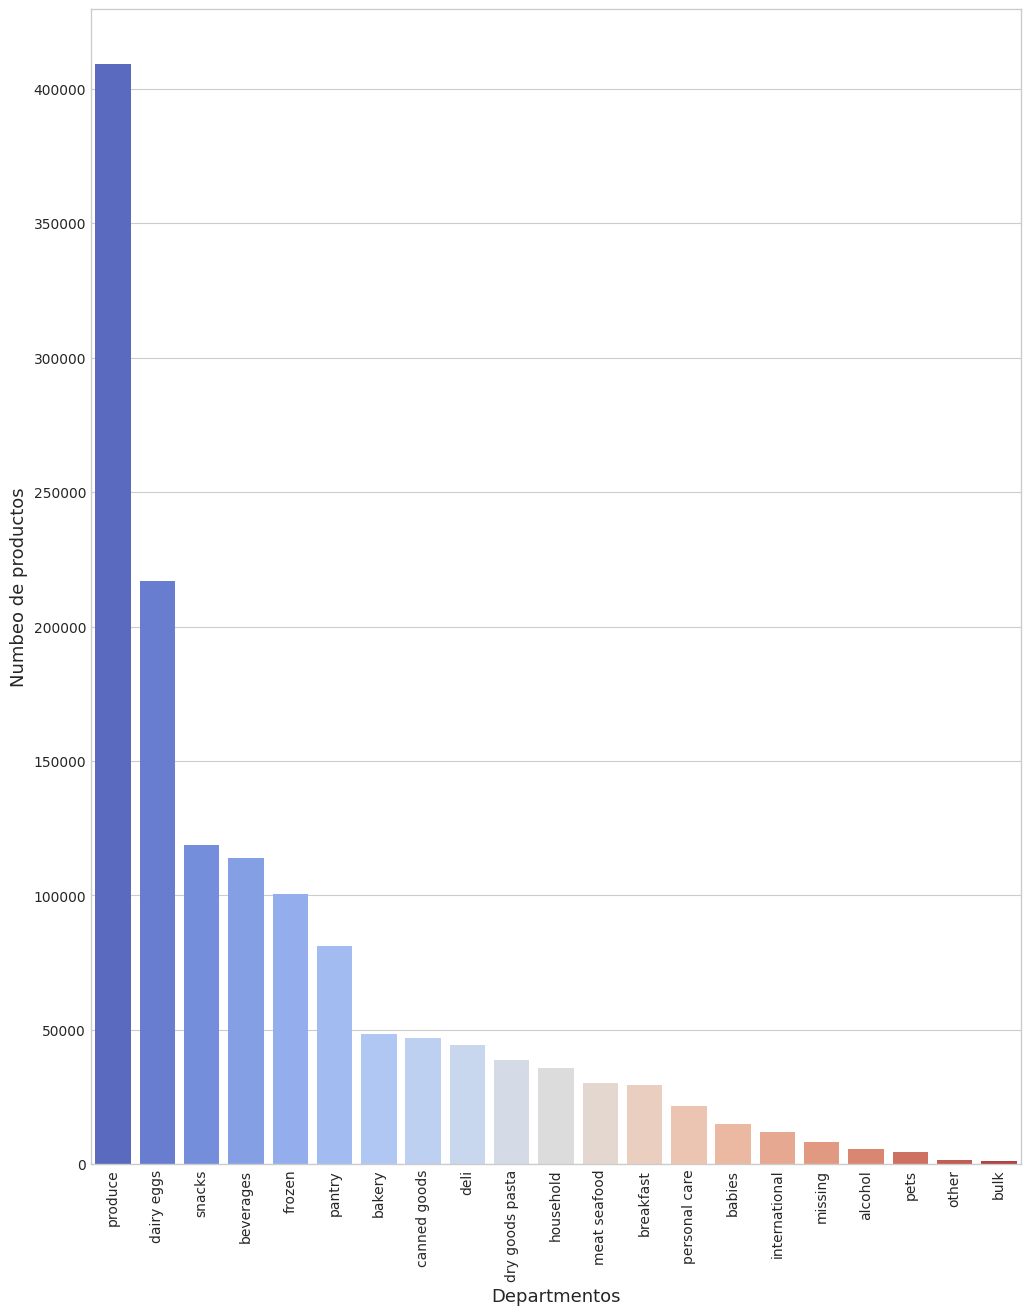

In [62]:
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.ylabel('Numbeo de productos', fontsize=13)
plt.xlabel('Departmentos', fontsize=13)
plt.show()

### Pasillos que más productos venden por cada Departamentos

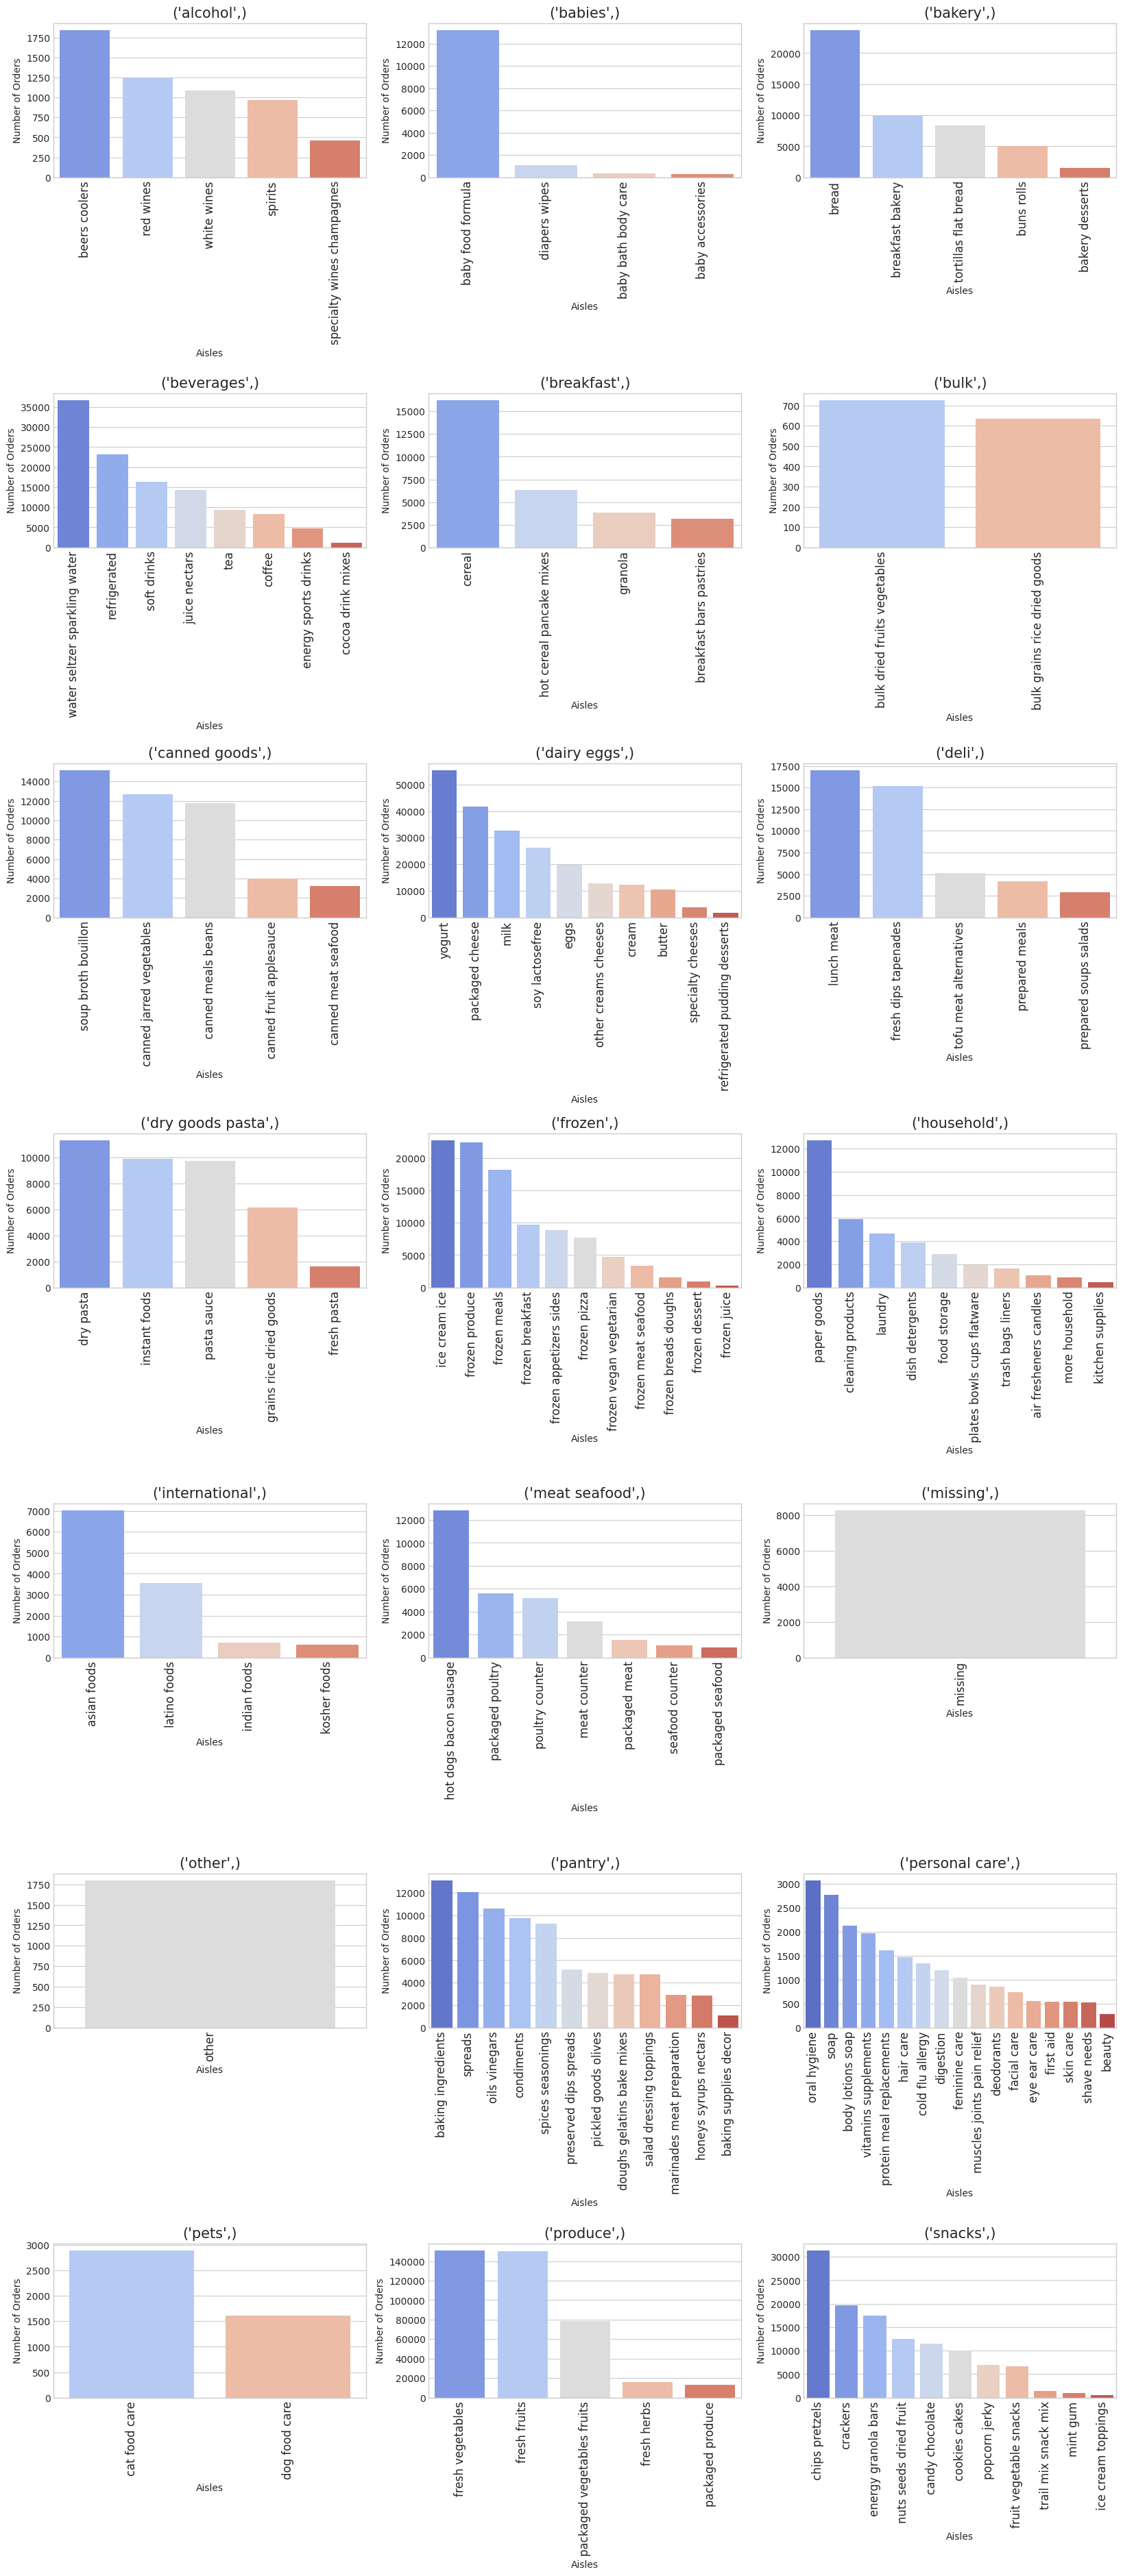

In [66]:
grouped = order_products_all.groupby(["department", "aisle"])["order_id"].agg(Total_orders='count').reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
fig, axes = plt.subplots(7, 3, figsize=(20, 45), gridspec_kw=dict(hspace=1.4))
for (department, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(x=group.aisle, y=group.Total_orders, ax=ax, palette='coolwarm')
    ax.set(xlabel="Aisles", ylabel="Number of Orders")
    g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
    ax.set_title(department, fontsize=15)

## Modelado

In [67]:
# Agrupar los productos por order_id y crear una lista de tuplas
grouped_rules = order_products_all.groupby('order_id')['product_name'].apply(list)

# Convertir las listas en tuplas
transacciones = [tuple(productos) for productos in grouped_rules]

transacciones

[('Bulgarian Yogurt',
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Organic Celery Hearts',
  'Cucumber Kirby',
  'Lightly Smoked Sardines in Olive Oil',
  'Bag of Organic Bananas',
  'Organic Hass Avocado',
  'Organic Whole String Cheese'),
 ('Grated Pecorino Romano Cheese',
  'Spring Water',
  'Organic Half & Half',
  'Super Greens Salad',
  'Cage Free Extra Large Grade AA Eggs',
  'Prosciutto, Americano',
  'Organic Garnet Sweet Potato (Yam)',
  'Asparagus'),
 ('Shelled Pistachios',
  'Organic Biologique Limes',
  'Organic Raw Unfiltered Apple Cider Vinegar',
  'Organic Baby Arugula',
  'Organic Hot House Tomato',
  'Green Peas',
  'Bunched Cilantro',
  'Flat Parsley, Bunch',
  'Fresh Dill'),
 ('Roasted Turkey',
  'Organic Cucumber',
  'Organic Grape Tomatoes',
  'Organic Pomegranate Kernels',
  'Organic Raspberries',
  'Organic Whole Strawberries',
  'Organic Blueberries'),
 ('Natural Spring Water',
  'Organic Orange Juice With Calcium & Vitamin D',
  'Whole Milk Greek Blen

In [72]:
min_support = 0.01
min_confidence = 0.05

conjuntos, reglas = apriori(transacciones,
                            min_support = min_support,
                            min_confidence = min_confidence)

# Filtrando reglas con consecuente de un elemento
#reglas = filter(lambda regla: len(regla.rhs) == 1, reglas)

In [74]:
len(reglas)

32

In [73]:
print(f"Reglas con Support: {min_support} y Confidence: {min_confidence}")
for regla in reglas:
    print(regla)

Reglas con Support: 0.01 y Confidence: 0.05
{Organic Baby Spinach} -> {Bag of Organic Bananas} (conf: 0.229, supp: 0.017, lift: 1.937, conv: 1.143)
{Bag of Organic Bananas} -> {Organic Baby Spinach} (conf: 0.144, supp: 0.017, lift: 1.937, conv: 1.082)
{Organic Hass Avocado} -> {Bag of Organic Bananas} (conf: 0.332, supp: 0.018, lift: 2.813, conv: 1.320)
{Bag of Organic Bananas} -> {Organic Hass Avocado} (conf: 0.156, supp: 0.018, lift: 2.813, conv: 1.119)
{Organic Raspberries} -> {Bag of Organic Bananas} (conf: 0.321, supp: 0.014, lift: 2.720, conv: 1.299)
{Bag of Organic Bananas} -> {Organic Raspberries} (conf: 0.115, supp: 0.014, lift: 2.720, conv: 1.082)
{Organic Strawberries} -> {Bag of Organic Bananas} (conf: 0.282, supp: 0.023, lift: 2.392, conv: 1.229)
{Bag of Organic Bananas} -> {Organic Strawberries} (conf: 0.199, supp: 0.023, lift: 2.392, conv: 1.144)
{Large Lemon} -> {Banana} (conf: 0.265, supp: 0.016, lift: 1.859, conv: 1.167)
{Banana} -> {Large Lemon} (conf: 0.115, supp: 0

# Preguntas

## a) Están interesados en saber qué productos o categorías de productos se venden bien juntos.

## b) A partir de ello, desean recomendaciones específicas separadas para su tienda virtual y sus tiendas físicas.

## c) Finalmente, están curiosos acerca de qué otra información podría darles las diversas bases de datos allí presentes que pudiese ser valiosa para comprender las dinámicas del comportamiento de sus usuarios /productos.